pip install opencv-python

pip install imutils

In [4]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as C
from tensorflow.keras import regularizers
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import load_model,Model
from tensorflow.python.keras.utils import conv_utils
from tensorflow.keras import regularizers, constraints, initializers
import pandas as pd
from tensorflow.keras.layers import GlobalAveragePooling2D
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

2.15.0


In [5]:
train_path=("C:\\Users\\darsh\\OneDrive\\Desktop\\4th SEM\\PYTHON\\mini project\\FINAL DATASET\\train")
test_path=("C:\\Users\\darsh\\OneDrive\\Desktop\\4th SEM\\PYTHON\\mini project\\FINAL DATASET\\test")
val_path=("C:\\Users\\darsh\\OneDrive\\Desktop\\4th SEM\\PYTHON\\mini project\\FINAL DATASET\\val")
batch_size = 32
img_height = 256
img_width = 256
no_of_clases = 19
clsses_name = ['antelope','bear','chimpanzee','cow','dog','donkey','elephant','goat','hippopotamus','horse','kangaroo','lion','leopard','ox','panda','sheep','tiger','wolf','zebra']
input_shape = (img_height,img_width,1)
datagen = ImageDataGenerator(rescale = 1./255,featurewise_center=True,horizontal_flip=False,vertical_flip = False,validation_split = 0.1,featurewise_std_normalization = True)

train_generator = datagen.flow_from_directory(train_path,target_size=(img_height,img_width),batch_size = batch_size, shuffle =True,class_mode = 'categorical')

validation_generator = datagen.flow_from_directory(val_path,target_size=(img_height,img_width),batch_size = batch_size, shuffle =True,class_mode = 'categorical')

print('train classes')
print(train_generator.class_indices)
print('train labels')
print(train_generator.labels)
print('validation clases')
print(validation_generator.class_indices)
print('validation labels')
print(validation_generator.labels)

Found 912 images belonging to 19 classes.
Found 133 images belonging to 19 classes.
train classes
{'antelope': 0, 'bear': 1, 'chimpanzee': 2, 'cow': 3, 'dog': 4, 'donkey': 5, 'elephant': 6, 'goat': 7, 'hippopotamus': 8, 'horse': 9, 'kangaroo': 10, 'leopard': 11, 'lion': 12, 'ox': 13, 'panda': 14, 'sheep': 15, 'tiger': 16, 'wolf': 17, 'zebra': 18}
train labels
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4

In [6]:
pretrained_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
    pooling='avg',
)

pretrained_model.trainable = False

In [7]:
inputs = pretrained_model.input
outputs = tf.keras.layers.Dense(19, activation='softmax')(pretrained_model.output)

model = tf.keras.Model(inputs, outputs)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 130, 130, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

 tchNormalization)                                                                                
                                                                                                  
 conv2_block3_preact_relu (  (None, 64, 64, 256)          0         ['conv2_block3_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 64, 64, 64)           16384     ['conv2_block3_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 64, 64, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv3_block2_1_relu (Activ  (None, 32, 32, 128)          0         ['conv3_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_2_pad (ZeroPa  (None, 34, 34, 128)          0         ['conv3_block2_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block2_2_conv (Conv2  (None, 32, 32, 128)          147456    ['conv3_block2_2_pad[0][0]']  
 D)                                                                                               
                                                                                                  
 conv3_block2_2_bn (BatchNo  (None, 32, 32, 128)          512       ['conv3_block2_2_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv3_block4_3_conv (Conv2  (None, 16, 16, 512)          66048     ['conv3_block4_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block4_out (Add)      (None, 16, 16, 512)          0         ['max_pooling2d_1[0][0]',     
                                                                     'conv3_block4_3_conv[0][0]'] 
                                                                                                  
 conv4_block1_preact_bn (Ba  (None, 16, 16, 512)          2048      ['conv3_block4_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv4_blo

 D)                                                                 0]']                          
                                                                                                  
 conv4_block3_1_bn (BatchNo  (None, 16, 16, 256)          1024      ['conv4_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block3_1_relu (Activ  (None, 16, 16, 256)          0         ['conv4_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block3_2_pad (ZeroPa  (None, 18, 18, 256)          0         ['conv4_block3_1_relu[0][0]'] 
 dding2D)                                                                                         
          

 conv4_block5_2_relu (Activ  (None, 16, 16, 256)          0         ['conv4_block5_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block5_3_conv (Conv2  (None, 16, 16, 1024)         263168    ['conv4_block5_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block5_out (Add)      (None, 16, 16, 1024)         0         ['conv4_block4_out[0][0]',    
                                                                     'conv4_block5_3_conv[0][0]'] 
                                                                                                  
 conv4_block6_preact_bn (Ba  (None, 16, 16, 1024)         4096      ['conv4_block5_out[0][0]']    
 tchNormal

                                                                                                  
 conv5_block2_preact_relu (  (None, 8, 8, 2048)           0         ['conv5_block2_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv5_block2_1_conv (Conv2  (None, 8, 8, 512)            1048576   ['conv5_block2_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv5_block2_1_bn (BatchNo  (None, 8, 8, 512)            2048      ['conv5_block2_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_blo

In [8]:
optimizers = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizers, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
history = model.fit(train_generator,validation_data = validation_generator, epochs=25)

C:\Users\darsh\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\darsh\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/25


29/29 [==============================] - 44s 1s/step - loss: 1.8929 - accuracy: 0.4912 - val_loss: 0.8102 - val_accuracy: 0.8346
Epoch 2/25
29/29 [==============================] - 39s 1s/step - loss: 0.4482 - accuracy: 0.9232 - val_loss: 0.4379 - val_accuracy: 0.9173
Epoch 3/25
29/29 [==============================] - 39s 1s/step - loss: 0.2245 - accuracy: 0.9704 - val_loss: 0.3386 - val_accuracy: 0.9323
Epoch 4/25
29/29 [==============================] - 39s 1s/step - loss: 0.1453 - accuracy: 0.9879 - val_loss: 0.3126 - val_accuracy: 0.9323
Epoch 5/25
29/29 [==============================] - 40s 1s/step - loss: 0.0992 - accuracy: 0.9978 - val_loss: 0.2803 - val_accuracy: 0.9398
Epoch 6/25
29/29 [==============================] - 40s 1s/step - loss: 0.0765 - accuracy: 0.9989 - val_loss: 0.2701 - val_accuracy: 0.9398
Epoch 7/25
29/29 [==============================] - 39s 1s/step - loss: 0.0584 - accuracy: 0.9989 - val_loss: 0.2651 - val_accuracy: 0.9398
Epoch 8/25
29/29 [

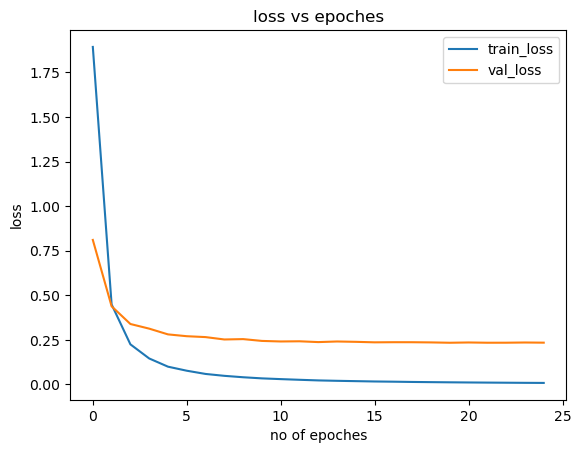

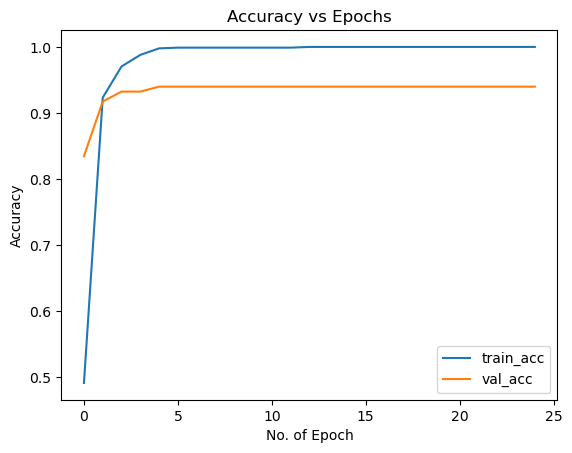

In [10]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('no of epoches')
plt.ylabel('loss')
plt.title('loss vs epoches')
plt.show()


plt.plot(history.history['accuracy'],label = 'train_acc')
plt.plot(history.history['val_accuracy'],label = 'val_acc')
plt.legend()
plt.xlabel('No. of Epoch')
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.show()

In [11]:
test_data = ImageDataGenerator(rescale=1./255)
test_generator = test_data.flow_from_directory(test_path, target_size=(256, 256), batch_size=32, shuffle=False, class_mode="categorical")



Found 95 images belonging to 19 classes.


In [12]:
predictions = np.argmax(model.predict(test_generator), axis=1)
matrix = confusion_matrix(test_generator.labels, predictions)
report= classification_report(test_generator.labels, predictions, target_names=test_generator.class_indices, zero_division=0)

3/3 [==============================] - 5s 1s/step


In [13]:
pred = model.predict(test_generator,verbose=1)
test_generator_indices = np.argmax(pred,axis=1)

print(test_generator_indices)

3/3 [==============================] - 4s 1s/step
[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3 15  4  4  4  4
  4  5  5  5  5  5  6  6  6  6  6  7  7 15  7  7  8  8  8  8  8  9  9  9
  9  9 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12  8 13 13 13 13 14 14
 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18]


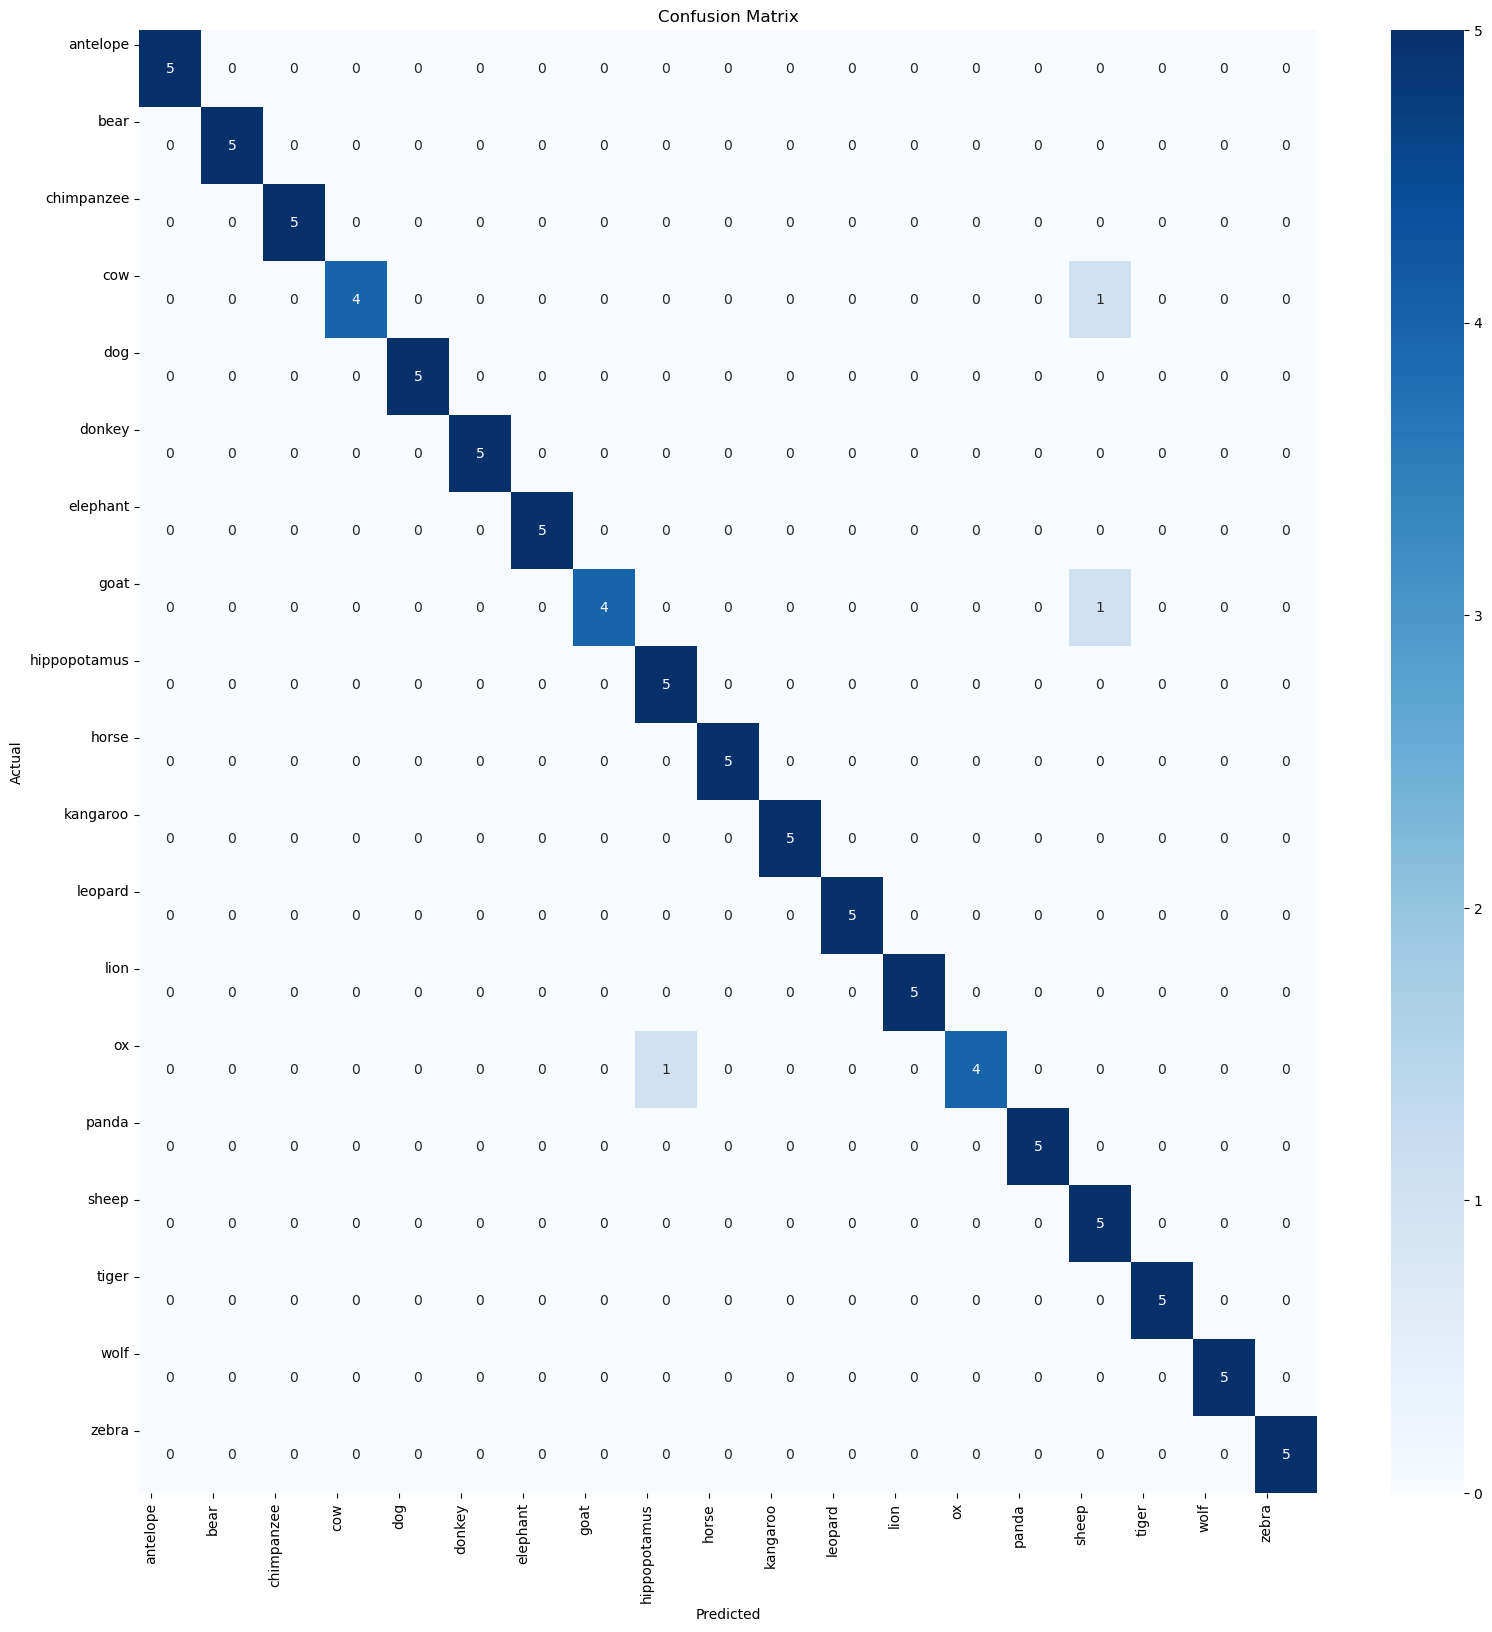

In [15]:
fig = plt.figure(figsize=(19,19))
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xticks(ticks=np.arange(19) + 0.19, labels=test_generator.class_indices, rotation=90)
plt.yticks(ticks=np.arange(19) + 0.19, labels=test_generator.class_indices, rotation=0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
fig.savefig("Confusion Matrix",dpi=700)

In [16]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    antelope       1.00      1.00      1.00         5
        bear       1.00      1.00      1.00         5
  chimpanzee       1.00      1.00      1.00         5
         cow       1.00      0.80      0.89         5
         dog       1.00      1.00      1.00         5
      donkey       1.00      1.00      1.00         5
    elephant       1.00      1.00      1.00         5
        goat       1.00      0.80      0.89         5
hippopotamus       0.83      1.00      0.91         5
       horse       1.00      1.00      1.00         5
    kangaroo       1.00      1.00      1.00         5
     leopard       1.00      1.00      1.00         5
        lion       1.00      1.00      1.00         5
          ox       1.00      0.80      0.89         5
       panda       1.00      1.00      1.00         5
       sheep       0.71      1.00      0.83         5
       tiger       1.00      1.00      1.00         5
   

1/1 [==============================] - 1s 1s/step


ValueError: num must be an integer with 1 <= num <= 20, not 21

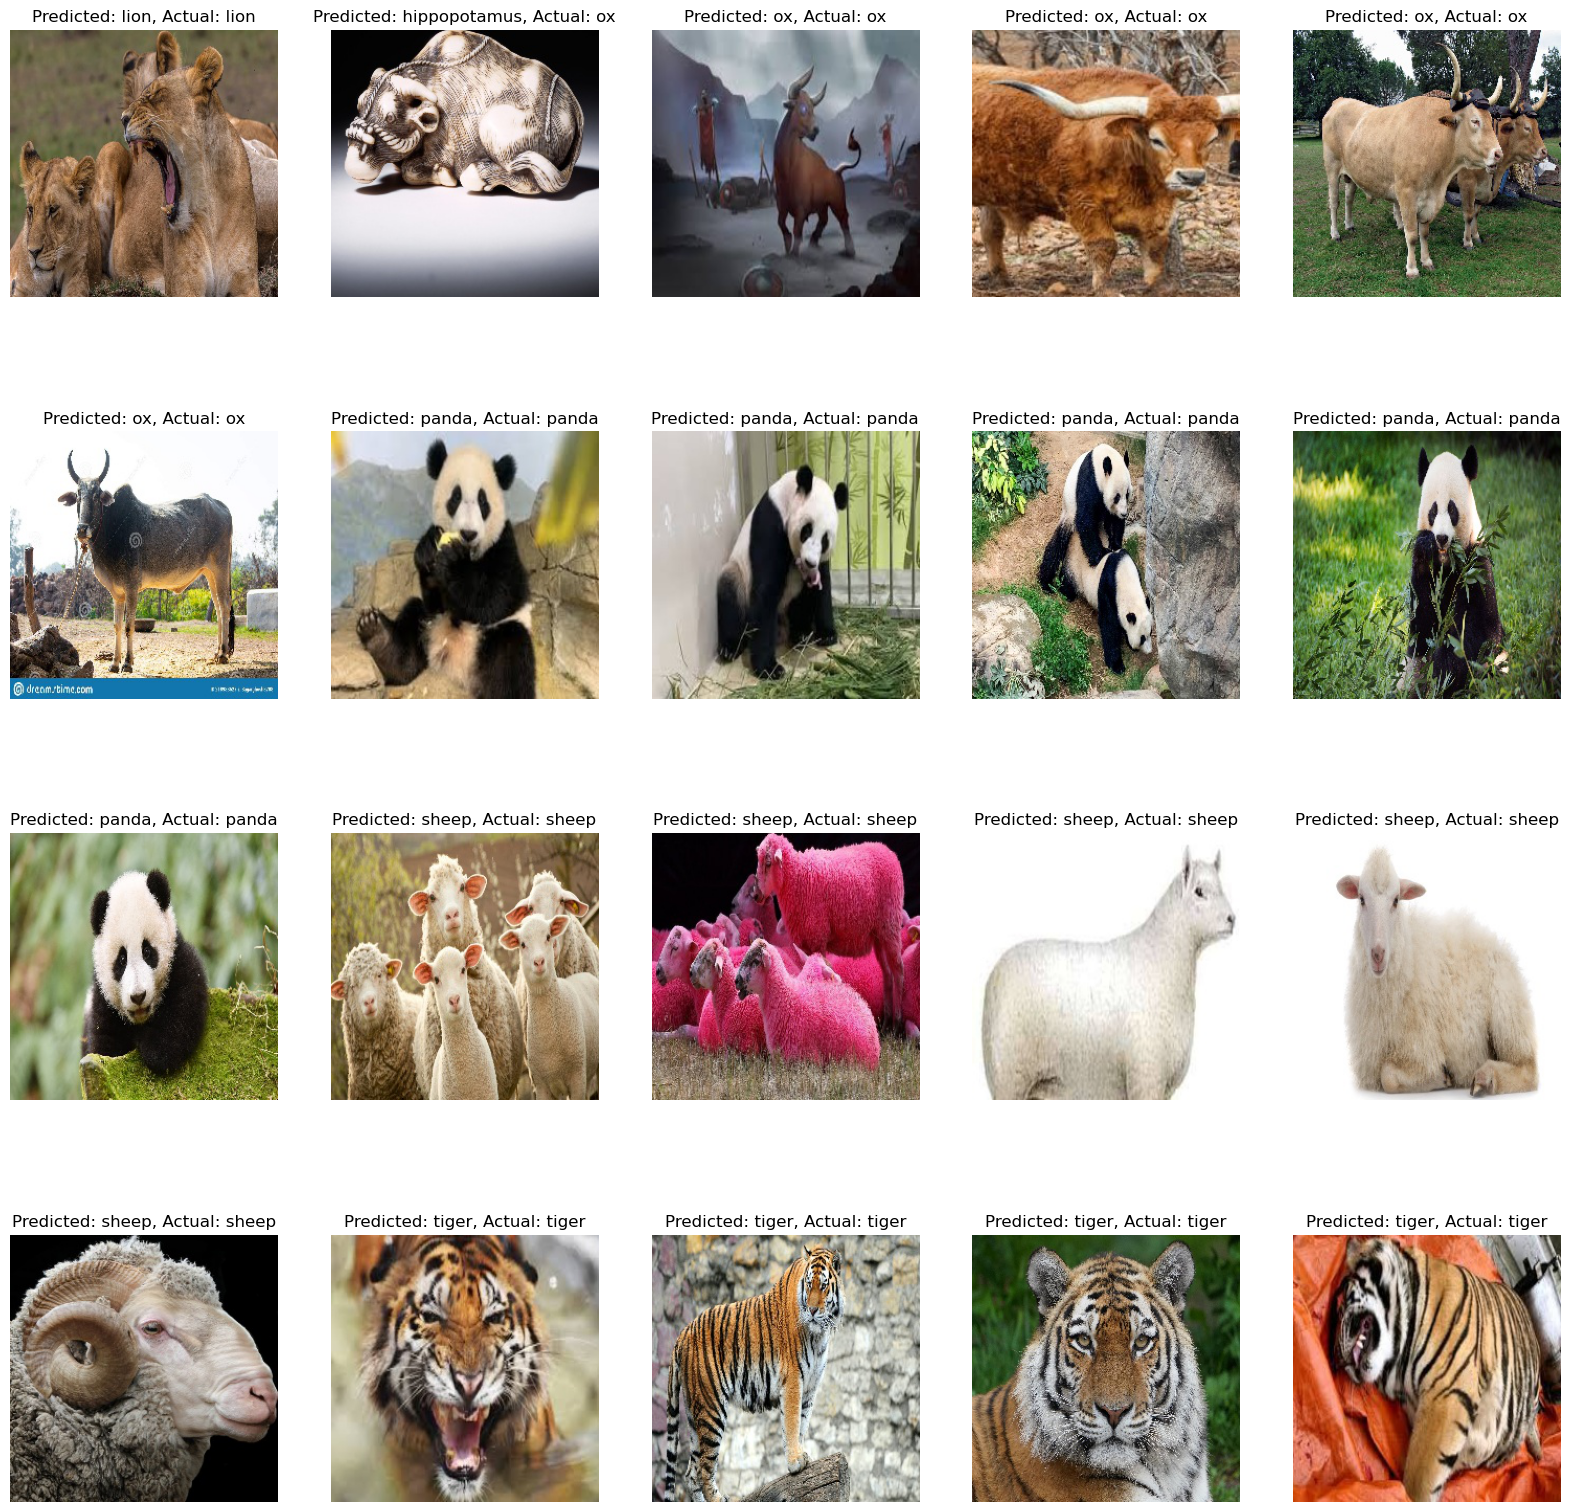

In [31]:
import matplotlib.pyplot as plt

# Get a batch of test data and their corresponding labels
batch_x, batch_y = test_generator.next()

# Make predictions for the batch of test data
predictions = model.predict(batch_x)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Define a function to convert class indices to class names
def get_class_name(index):
    for class_name, class_index in test_generator.class_indices.items():
        if class_index == index:
            return class_name
    return "Unknown"

# Calculate the number of rows and columns based on the number of images
num_images = len(batch_x)
num_rows = (num_images // 8) + 1
num_cols = min(num_images, 5)

# Visualize the images with their predicted labels
plt.figure(figsize=(20, 20))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(batch_x[i])
    plt.title(f"Predicted: {get_class_name(predicted_labels[i])}, Actual: {get_class_name(np.argmax(batch_y[i]))}")
    plt.axis('off')

plt.show()
